In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_2d_convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    result_height = image_height - kernel_height + 1
    result_width = image_width - kernel_width + 1
    
    result = np.zeros((result_height, result_width))
    
    for i in range(result_height):
        for j in range(result_width):
            result[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
    return result

def create_smoothing_kernel(kernel_size):
    if kernel_size % 2 == 0 or kernel_size < 3:
        raise ValueError("Kernel size should be an odd number greater than or equal to 3.")
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    return kernel

def create_sharpening_kernel(kernel_size):
    if kernel_size % 2 == 0 or kernel_size < 3:
        raise ValueError("Kernel size should be an odd number greater than or equal to 3.")
    
    kernel_sharpening = np.ones((kernel_size, kernel_size), dtype=np.float32) * (-1 / (kernel_size**2))
    kernel_sharpening[kernel_size//2, kernel_size//2] = (kernel_size**2 - 1) / (kernel_size**2)
    
    return kernel_sharpening

def apply_2d_convolution_cv2(image, kernel):
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

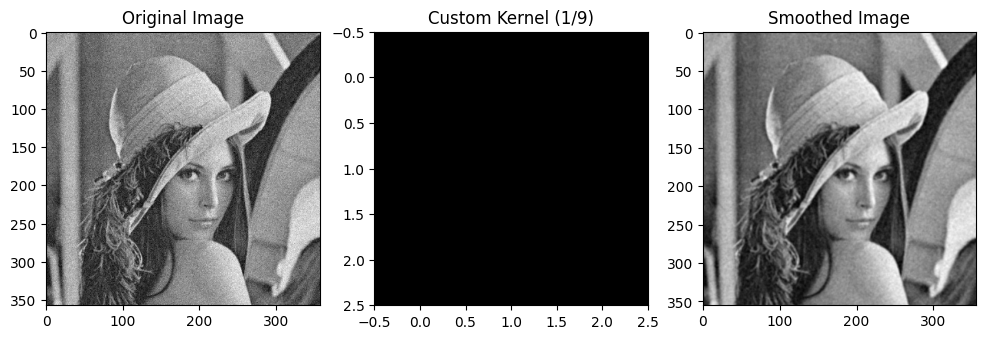

In [11]:
############Image smoothing, low pass filter ##########

image_path = './lena_noise.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel_size = 3
kernel = create_smoothing_kernel(kernel_size)


# Apply convo_2d
smoothed_image = apply_2d_convolution(original_image, kernel)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(kernel, cmap='gray')
plt.title('Custom Kernel (1/{})'.format(kernel_size**2))

plt.subplot(1, 3, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')

plt.show()


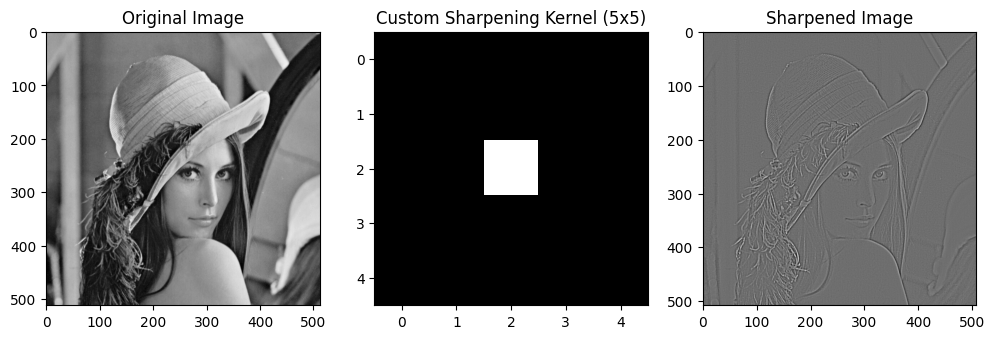

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'lena.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel_size = 5
kernel_sharpening = create_sharpening_kernel(kernel_size)

sharpened_image = apply_2d_convolution(original_image, kernel_sharpening)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(kernel_sharpening, cmap='gray')
plt.title(f'Custom Sharpening Kernel ({kernel_size}x{kernel_size})')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')

plt.show()


### Edge detection application

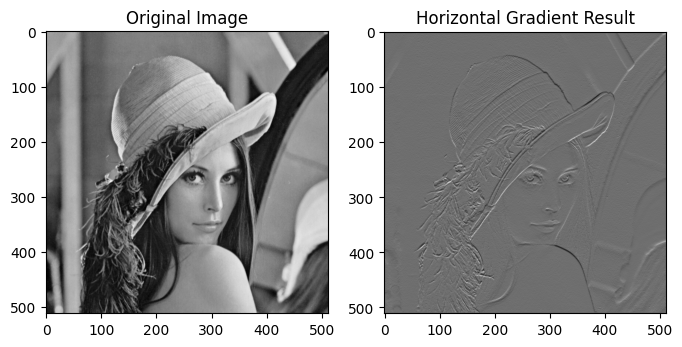

In [17]:
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

horizontal_kernel = np.array([[-1, 1]])
vertical_kernel = np.array([[1], [-1]])
horizontal_gradient_result = apply_2d_convolution(image, vertical_kernel)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(horizontal_gradient_result, cmap='gray')
plt.title('Horizontal Gradient Result')

plt.show()

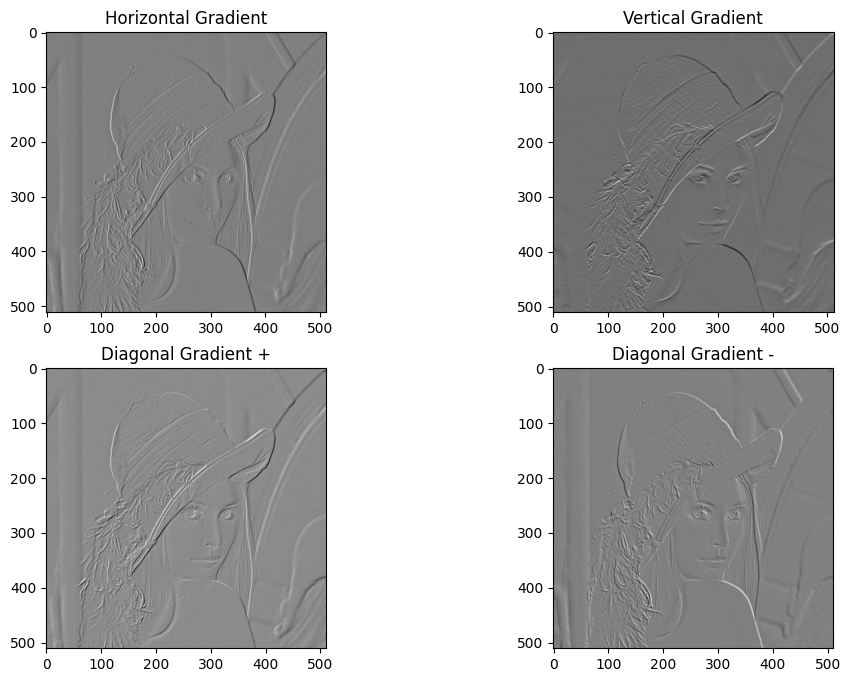

In [3]:
image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

horizontal_kernel = np.array([[-1, 1]])
vertical_kernel = np.array([[1], [-1]])
diagonal_h_plus = np.array([[-1, 0],
                              [0, 1]])
diagonal_h_minus = np.array([[0, -1],
                              [1, 0]])

horizontal_gradient_result = apply_2d_convolution(image, horizontal_kernel)
vertical_gradient_result = apply_2d_convolution(image, vertical_kernel)
diagonal_result_h_plus = apply_2d_convolution(image, diagonal_h_plus)
diagonal_result_h_minus = apply_2d_convolution(image, diagonal_h_minus)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(horizontal_gradient_result, cmap='gray')
axs[0, 0].set_title('Horizontal Gradient')

axs[0, 1].imshow(vertical_gradient_result, cmap='gray')
axs[0, 1].set_title('Vertical Gradient')

axs[1, 0].imshow(diagonal_result_h_plus, cmap='gray')
axs[1, 0].set_title('Diagonal Gradient +')

axs[1, 1].imshow(diagonal_result_h_minus, cmap='gray')
axs[1, 1].set_title('Diagonal Gradient -')

plt.show()

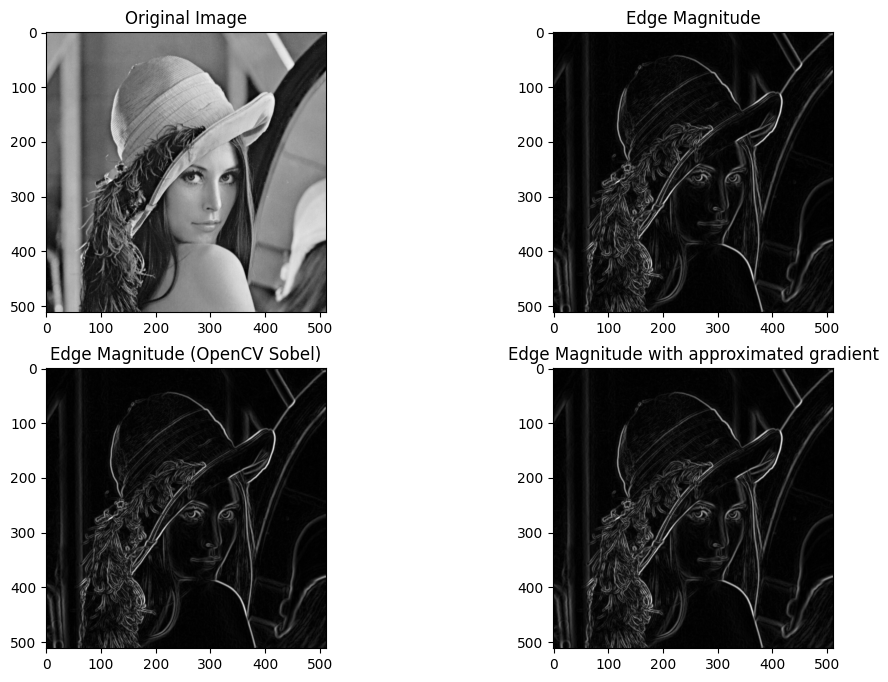

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def calculate_edge_magnitude_gradient_approximation(image):
    gradient_x = np.zeros_like(image, dtype=np.float32)
    gradient_y = np.zeros_like(image, dtype=np.float32)

    for x in range(1, image.shape[0]):
        gradient_x[x, :] = image[x, :] - image[x - 1, :]

    for y in range(1, image.shape[1]):
        gradient_y[:, y] = image[:, y] - image[:, y - 1]

    edge_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return edge_magnitude

def calculate_edge_magnitude(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    return edge_magnitude

image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

edge_magnitude = calculate_edge_magnitude(image)
edge_magnitude_approximate = calculate_edge_magnitude(image.astype(np.float32) / 255.0)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(edge_magnitude, cmap='gray')
axs[0, 1].set_title('Edge Magnitude')

axs[1, 0].imshow(cv2.magnitude(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5), 
                        cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)), cmap='gray')
axs[1, 0].set_title('Edge Magnitude (OpenCV Sobel)')

axs[1, 1].imshow(edge_magnitude_approximate, cmap='gray')
axs[1, 1].set_title("Edge Magnitude with approximated gradient")


plt.show()


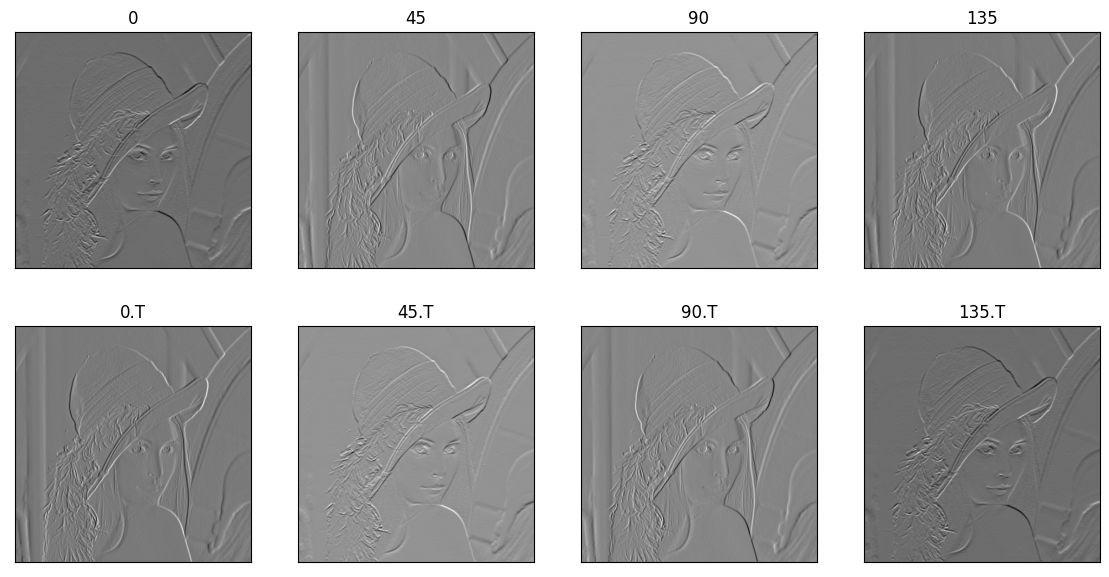

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def prewitt_operator(image, operator):
    result = apply_2d_convolution(image, operator)
    return result

image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)


P1 = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]])

P2 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])

P3 = np.array([[-1, -1, -1],
               [0, 0, 0],
               [1, 1, 1]])

P4 = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])

#P5 đến P8 bằng chuyển vị P1 đến P4
P5, P6, P7, P8 = P1.T, P2.T, P3.T, P4.T

# Áp dụng Prewitt operators cho hình ảnh
result_P1 = prewitt_operator(image, P1)
result_P2 = prewitt_operator(image, P2)
result_P3 = prewitt_operator(image, P3)
result_P4 = prewitt_operator(image, P4)
result_P5 = prewitt_operator(image, P5)
result_P6 = prewitt_operator(image, P6)
result_P7 = prewitt_operator(image, P7)
result_P8 = prewitt_operator(image, P8)

# Hiển thị kết quả bằng Matplotlib với cửa sổ lớn hơn
plt.figure(figsize=(14, 7))

titles = ['0', '45', '90', '135', '0.T', '45.T', '90.T', '135.T']
results = [result_P1, result_P2, result_P3, result_P4, result_P5, result_P6, result_P7, result_P8]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(results[i], cmap='gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])

plt.show()


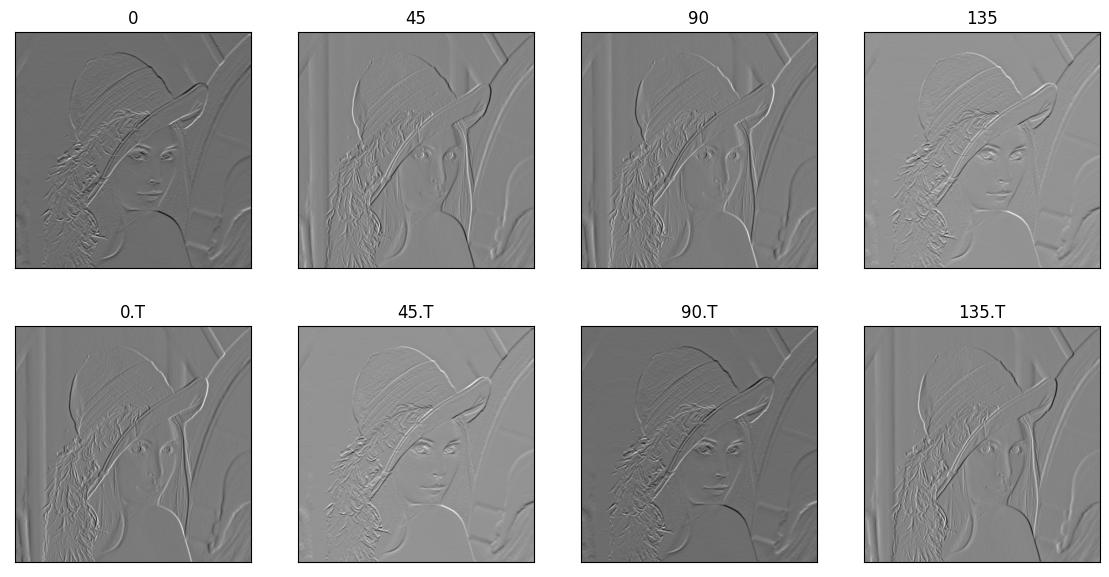

In [9]:
#####################Sobel operators##################

import cv2
import numpy as np
import matplotlib.pyplot as plt



def sobel_operator(image, operator):
    result = apply_2d_convolution(image, operator)
    return result

image = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

# Tạo các Sobel operators
S1 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

S2 = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

S3 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])

S4 = np.array([[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]])


S5, S6, S7, S8 = S1.T, S2.T, S3.T, S4.T


result_S1 = sobel_operator(image, S1)
result_S2 = sobel_operator(image, S2)
result_S3 = sobel_operator(image, S3)
result_S4 = sobel_operator(image, S4)
result_S5 = sobel_operator(image, S5)
result_S6 = sobel_operator(image, S6)
result_S7 = sobel_operator(image, S7)
result_S8 = sobel_operator(image, S8)


plt.figure(figsize=(14, 7))


titles = ['0', '45', '90', '135', '0.T', '45.T', '90.T', '135.T']
results = [result_S1, result_S2, result_S3, result_S4, result_S5, result_S6, result_S7, result_S8]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(results[i], cmap='gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])

plt.show()


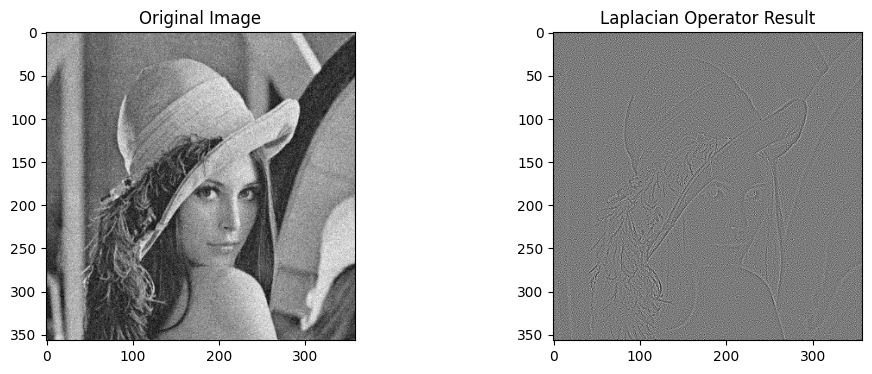

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('lena_noise.jpg', cv2.IMREAD_GRAYSCALE)

laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

laplacian_result = cv2.Laplacian(image, cv2.CV_64F)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian Operator Result')

plt.show()


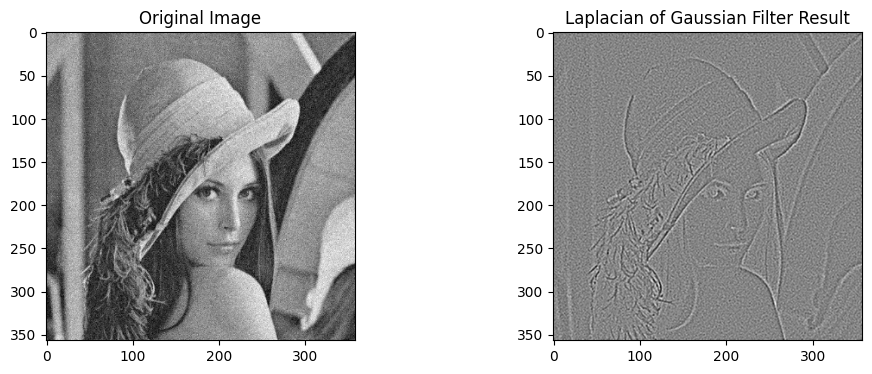

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_laplacian_of_gaussian(image, kernel_size):
    smoothed_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

    laplacian_result = cv2.Laplacian(smoothed_image, cv2.CV_64F)

    return laplacian_result

image = cv2.imread('lena_noise.jpg', cv2.IMREAD_GRAYSCALE)


loG_result = apply_laplacian_of_gaussian(image, 3)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(loG_result, cmap='gray')
plt.title('Laplacian of Gaussian Filter Result')

plt.show()
